# Diferencialinės lygtys P5

Turinys:

* Numpy skaičiavimas su neapibrėžtumais
* Pavyzdys: krypčių laukas su neapibrėžtumais
* Programavimo projektai prieš tarpinį egzaminą

# Numpy skaičiavimas su neapibrėžtumais

In [311]:
import numpy as np
import matplotlib.pyplot as plt

Braižant diferencialinių lygčių sprendinių grafikus arba krypčių laukus, dažnai pasitaiko neapibrėžtos reikšmės dėl negalimų aritmetinių ar funckinių veiksmų: dalybos iš nulio, kvadratinės šaknies iš neigiamų skaičių, arcsin(2) ir pan.

In [312]:
A = np.linspace(-1,1,11)
A

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

Čia traukiant kvadratinę šaknį iš neigiamų skaičių, Numpy rezultatas fiksuojamas kaip "nan" (angl., "not a number") atitinkamose vietoje. Fiksuojamas perspėjimas vietoj klaidos.

In [313]:
np.sqrt(A)

array([       nan,        nan,        nan,        nan,        nan,
       0.        , 0.4472136 , 0.63245553, 0.77459667, 0.89442719,
       1.        ])

Paruošiame antrą masyvą dalybai.

In [314]:
B = np.linspace(0,2,11)
B

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

Dalinant pirmuosius skaičius, gaunasi dalyba iš nulio. Numpy rezultatą fiksuoja (su perspėjimu) kaip "inf" (begalybė), "-inf" (minus begalybė), ar "nan" (neapibržta) atitinkamoje vietoje.

Galėtumėme naudoti toliau "matplotlib" komandose.

Gilinimuisi apie vieno kintamojo funkcijų su ypatingais taškais (singuliarumais) grafikų braižymą:
* https://github.com/sympy/sympy/issues/18455
* https://www.py4u.net/discuss/13731.

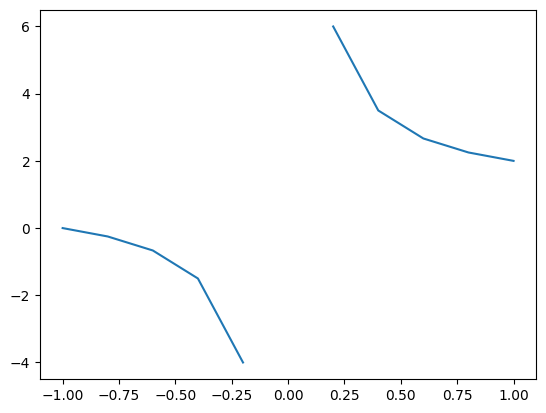

In [315]:
plt.figure()
plt.plot(A,M)

Tokios aritmetinio skaičiavimo klaidos valdomos Numpy komanda "seterr()". Žr. https://numpy.org/doc/stable/reference/generated/numpy.seterr.html 

In [316]:
np.seterr()

{'divide': 'raise', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

Galime nustatyti skaičiavimo nutraukimą (su klaidos deklaracija) atleikant dalybą iš nulio. 

In [317]:
np.seterr(divide="raise")
np.seterr()

{'divide': 'raise', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

Galime nustatyti dalybos iš nulio ignoravimą, be jokio perspėjimo. 

In [318]:
np.seterr(divide="ignore")
np.seterr()

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [319]:
A/B

array([       -inf, -4.        , -1.5       , -0.66666667, -0.25      ,
        0.        ,  0.16666667,  0.28571429,  0.375     ,  0.44444444,
        0.5       ])

Bet tai dar ne-ignorous dalybos 0/0, nors suskaičiuota reikšmė "nan" = "Not a Number".  

In [320]:
A[0]=0
A

array([ 0. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [321]:
B/A

array([        nan, -0.25      , -0.66666667, -1.5       , -4.        ,
               inf,  6.        ,  3.5       ,  2.66666667,  2.25      ,
        2.        ])

Galima nustatyti ir dalybą 0/0, be jokio perspėjimo.

In [322]:
np.seterr(invalid="ignore")
np.seterr()

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [323]:
B/A

array([        nan, -0.25      , -0.66666667, -1.5       , -4.        ,
               inf,  6.        ,  3.5       ,  2.66666667,  2.25      ,
        2.        ])

Neigiamų skaičių kvadratinės šaknys tada skaičiuojamos kaip "nan", be jokio perspėjimo.

In [324]:
np.sqrt(A)

array([0.        ,        nan,        nan,        nan,        nan,
       0.        , 0.4472136 , 0.63245553, 0.77459667, 0.89442719,
       1.        ])

Kadangi klaidų ar perspėjimų manipuliavimas turėtų būti lokalus, keičiant "np.seterr" Python'o procedūrose reikėtų išsaugoti ir atstatyti ankstesnes reikšmes (žr. kintamojo "old_settings" apibrėžimą ir naudojimą nuorodoje https://numpy.org/doc/stable/reference/generated/numpy.seterr.html).

Gilinimuisi, kaip tvarkyti Python'o klaidų ir perspėjimų pranešimus; žr. https://ffff.lt/py/tutorial/interpreter.html#klaidu-valdymas

# Pavyzdys: krypčių laukas su neapibrėžtumais

Kopijuojame enkapsuliuotą krypčių lauko braižymo procedūrą ir praeitos paskaitos 

In [325]:
def KrypciuLaukas(F, X2, Y2):
    FY = F(X2,Y2)
    FX = 1/np.sqrt(FY**2 + 1)
    FY = FY*FX
    return (FX,FY)

Nustatome braižymo parametrus ir koordinatinius masyvus.

In [326]:
xa,xb = -1,1
ya,yb = -1,1
N = 21

In [327]:
X = np.linspace(xa,xb,N)
Y = np.linspace(ya,yb,N)
X2,Y2 = np.meshgrid(X,Y)

Nagrinėsime diferencialinę lygtį $\ y'=\sqrt{1-x^2-y^2}\ $ su apskritimine apibrėžimo sritimi.

In [328]:
def F(x,y):
    return np.sqrt(1-x**2-y**2)

Skaičiuojant krypčių lauką, gauname perspėjimus dėl "nan" reikšmių.

In [329]:
GX,GY = KrypciuLaukas( F, X2, Y2)

Taip atrodo krypčių lauko x-koordinatės arti kairiojo krašto:

In [330]:
GX[1]

array([       nan,        nan,        nan,        nan,        nan,
              nan, 0.98532928, 0.95346259, 0.93250481, 0.92057462,
       0.9166985 , 0.92057462, 0.93250481, 0.95346259, 0.98532928,
              nan,        nan,        nan,        nan,        nan,
              nan])

Braižant krypčių lauką, neapibrėžtos "nan" reikšmės yra ignoruojamos.

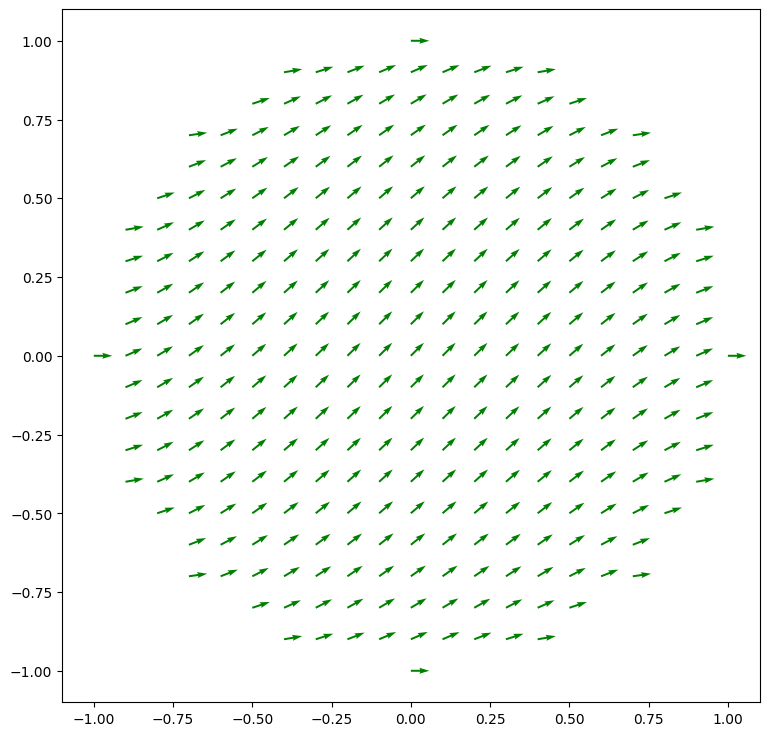

In [331]:
plt.figure( figsize=(9,9))
plt.quiver( X2, Y2, GX, GY, color="green")
plt.show()

Būtų neblogai dar nubrėžti apibrėžimo srities kraštą, ir paeksperimentuoti, kaip Scipy komanda "odeint" elgiasi su "nan" reikšmėmis, apibrėžimo srities kraštais.

# Programavimo projektai prieš tarpinį egzaminą

## 1. Perturbuotų integralinių kreivių braižymas

Duotai pirmos eilės diferencialinei lygčiai su Koši pradine sąlyga, nubrėžti atitinkamo sprendinio grafiką, kartu su dar bent dviejų perturbuotų ("sutrikdytų") sprendinių grafikais, kurių pradinė sąlyga skiriasi gan mažai. Taip matytųsi sprendinių stabilumas pradinės Koši sąlygos atžvilgiu.

Duotos pradinės sąlygos perturbavimas gali būti užduotas kaip parametras, arba nustatytas "automatiškai" taikant į matomą informatyvų skirtumą tarp sprendinių. Platesnis variantas: braižyti daugiau artimų integralinių kreivių, arba pasirinkti Koši pradines sąlygas automatiškai.

## 2. Ortogonalūs krypčių laukai

Dviejų pirmos eilės diferencialinių lygčių su ortogonaliais krypčių laukais integralinių kreivių (ar bent pačių krypčių laukų) braižymas. Ortogonalūs krypčių laukai apibrėžti antros paskaitos 9-oje skaidrėje: uždavus vieną diferencialinę lygtį $\ y'=F(x,y),\ $ kitos diferencinės lygties $\ F(x,y)\,y'+1=0\ $ krypčių laukas bus ortogonalus (t.y., $90^o$ statmenas duotos lygties krypčių laukui) kiekviename taške.

Praktiškai tikimasi arba dviejų (statmenų) krypčių laukų braižymo vienoje $(x,y)$-srityje skirtingomis spalvomis, arba panašiai, dviejų integralinių kreivių šeimų braižymo vienoje $(x,y)$-srityje.

## 3. Krypčių laukas naudojant izoklines

Duotai pirmos eilės diferencialinei lygciai, informatyvus kelių integralinių kreivių ir krypčių lauko vektorių 
(remiantis izoklinėmis) braižymas.

Patogiausias krypčių lauko braižymas yra su gardele per visą numatytą (x,y)-kitimo sritį. Norėtųsi pamatyti krypčių laukų, braižytų (su Python'u) "senoviniu" žmogišku būdu su izoklinėmis (žr. antros paskaitos skaidres Nr. 7 ir 8). Tikslai būtų:
* Pabraižyti krypčių $y'=0$, $y'=\infty$, $y'=\pm 1$ ir šeimas, telpančias į numatytą (x,y)-kitimo sritį.   
* Pabraižyti daugiau krypčių, kad nebūtų per didelių tuščių plotų.
* Nubrėžtos kryptys "nesigrųstų" viena ant kitos.

Taip pat galima pradėti nuo kelių integralinių kreivių braižymo, ir aplink jas nurodinėti krypčių jau nereikėtų. Tada užpildyti tuštesnius plotus su standartinėmis kryptimis $y'=0$, $y'=\infty$, $y'=\pm 1$, ir pan.; ir galų gale daugiau krypčių, kad paveiksliukas būtų gan tolygiai užpildytas. Tada pirmas žingsnis būtų pasirinkti integralines kreives. Pvz., įdomios būtų kreivės su perlenkimo taškais $y''=0$.

Tai būtų kūrybingiausias projektėlis, apie kurį teks ir padiskuotuoti.

In [332]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
import random

In [333]:
class Graph:

    def __init__(self, y_diff = lambda x,y: np.sqrt(1-x**2-y**2), koshi_point = (0,0), bounds = [(-1,1), (-1,1)]):
        self.xBounds = bounds[0]
        self.yBounds = bounds[1]
        self.y_diff = y_diff
        self.koshi_point = koshi_point
        # Non-essential parameters
        self.koshi_cutoff_k = 10
        self.samples = 21
        self.perturbation = (0.001, -0.01)

    def field(self, F, X2, Y2):
        FY = F(X2,Y2)
        FX = 1/np.sqrt(FY**2 + 1)
        FY = FY*FX
        return (FX,FY)

    def plot(self, koshi_points = []):
        if(self.yBounds == None and koshi_points != []):
            raise BaseException("Y bounds must be defined to plot multiple Koshi curves")

        curves = [self.oiler_approx()] if koshi_points == [] else [self.oiler_approx(p) for p in koshi_points] 

        if(koshi_points == []):
            koshi_points = [self.koshi_point]

        
        perturbed_curves = []
        if self.perturbation != None:
            for kp in koshi_points:
                perturbed_curves += [self.oiler_approx(c) for c in [np.array(kp) + self.perturbation, np.array(kp) - self.perturbation]]
        
        x = np.linspace(self.xBounds[0],self.xBounds[1],self.samples)
        if(self.yBounds == None): # Since Y bounds are undefined - we will be drawing only one curve - the main Koshi curve
            _min = min([c[1] != np.inf and not np.isnan(c[1]) and c[1] for c in curves[0]])
            _max = max([c[1] != np.inf and not np.isnan(c[1]) and c[1] for c in curves[0]])
            y = np.linspace(_min, _max,self.samples)
        else:
            y = np.linspace(self.yBounds[0],self.yBounds[1],self.samples)
        

        X,Y = np.meshgrid(x,y)
        U,V = self.field(self.y_diff, X, Y)
        plt.figure( figsize=(9,9))
        plt.quiver( X, Y, U, V, color="green")

        for kp in koshi_points:
            plt.plot(kp[0], kp[1], 'ro', label="Koši taškas")
        plt.ylim(self.yBounds)

        for (curve, color) in [*[(c, "red") for c in curves], *[(c,None) for c in perturbed_curves]]:
            X,Y = ([x[0] for x in curve], [x[1] for x in curve])
            plt.plot(X, Y, color=color)

        plt.legend()
        plt.show()
    
    def oiler_approx(self, koshi_point = None): # Taylor series approximation up to and including the square term
        if koshi_point is None:
            koshi_point = self.koshi_point
        h = 0.001
        arrSize = int((self.xBounds[1]-self.xBounds[0])/h)
        curve = [None] * (arrSize)
        koshi_index = min(int(abs(koshi_point[0]-self.xBounds[0])/h), arrSize-1)
        curve[koshi_index] = (np.float64(koshi_point[0]), np.float64(koshi_point[1]))
        
        nanFlag = False
        for i in range(koshi_index+1, arrSize):
            if nanFlag:
                curve[i] = (self.xBounds[0] + i*h, np.inf)
                continue
            curve[i] = (self.xBounds[0] + i*h, curve[i-1][1] + h * self.y_diff(curve[i-1][0], curve[i-1][1]) + self.numeric_diff(self.y_diff, (curve[i-1][0], curve[i-1][1]))*h**2/2)
            if(curve[i][1] == np.inf or abs(curve[i][1] - curve[i-1][1]) > self.koshi_cutoff_k*h):
                curve[i] = (self.xBounds[0] + i*h, np.inf)
                nanFlag = True

        nanFlag = False
        for i in range(koshi_index-1, -1, -1):
            if nanFlag:
                curve[i] = (self.xBounds[0] + i*h, np.inf)
                continue
            
            curve[i] = (self.xBounds[0] + i*h, curve[i+1][1] - h * self.y_diff(curve[i+1][0], curve[i+1][1]) - self.numeric_diff(self.y_diff, (curve[i+1][0], curve[i+1][1]))*h**2/2)
            if(curve[i][1] == np.inf or abs(curve[i+1][1] - curve[i][1]) > self.koshi_cutoff_k*h):
                curve[i] = (self.xBounds[0] + i*h, np.inf)
                nanFlag = True
        # print(curve)
        return curve

    def find_interesting_points(self, sample_size = 100, epsilon = 0.75, limit_points = 0):
        # We will define interesting points as points where the second derivative is within 1% of some value controlled by epsilon, where epsilon is normalized
        if(self.yBounds == None):
            raise BaseException("Y bounds must be defined to find interesting points") # Y bounds must be defined to find interesting points, otherwise, Koshi point must already be selected
        sample_space_x = np.linspace(self.xBounds[0],self.xBounds[1],sample_size)
        sample_space_y = np.linspace(self.yBounds[0],self.yBounds[1],sample_size)
        interesting_points = []
        # Commented is the symbolic approach, which does not always work
        # x,y = sp.symbols('x y')
        # f = self.y_diff(x,y)
        # f2 = sp.diff(f,x)
        # initial_set = [ya != np.inf and (xa,ya) for xa in sample_space_x for ya in sample_space_y if abs(r := f2.subs({x: xa, y: ya}).doit().evalf()) > math.tan(math.pi*epsilon/2) and r != sp.zoo and r != sp.oo]
        initial_set = [ya != np.inf and (xa,ya) for xa in sample_space_x for ya in sample_space_y if abs(r := self.numeric_diff(self.y_diff, (xa,ya))) > math.tan(math.pi*epsilon/2) and r != np.inf and r != np.nan]
        if(limit_points > 0):
            random.shuffle(initial_set)
            return initial_set[:limit_points]
        return initial_set

    def numeric_diff(self, F, point):
        d = 0.0001
        return (F(point[0]+d, point[1]+d)-F(*point))/d

    @staticmethod
    def noErrors():
        np.seterr(divide='ignore', invalid='ignore')


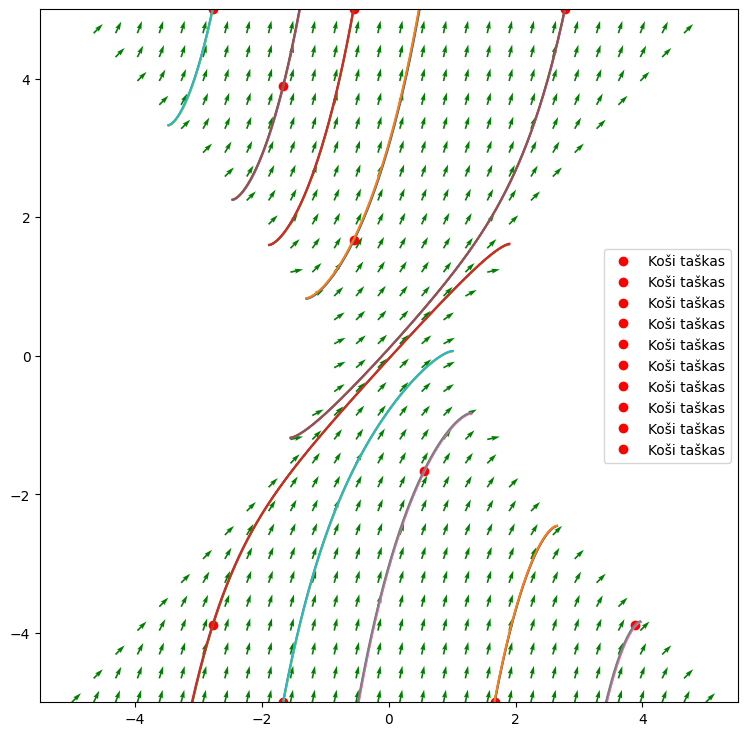

In [334]:
g = Graph(lambda x,y: np.sqrt(1-x**2+y**2), bounds=[(-5, 5), (-5, 5)])
Graph.noErrors()
g.samples = 30
# g.perturbe = False
points = g.find_interesting_points(sample_size=10, epsilon=0.2, limit_points=10)
g.plot(points)
# g.plot([(0,1), (4,-5), (-4,-5)])

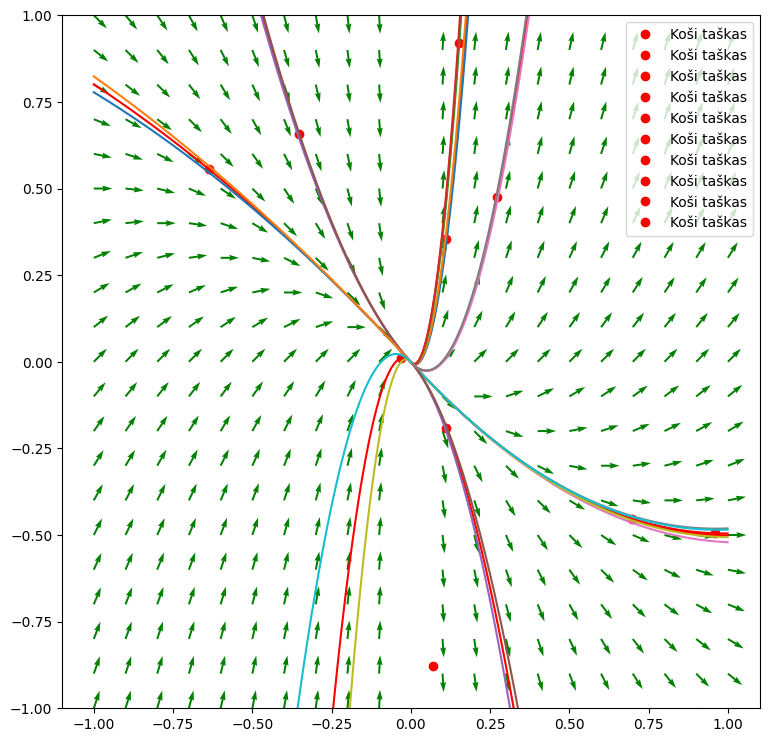

In [335]:
g = Graph(lambda x,y: (x + 2*y) / x)
# g = Graph(lambda x,y: x/y)
g.koshi_point = (-1, -0.97)
# g = Graph(lambda x,y: np.sqrt(1-x**2-y**2)/y**2)
points = g.find_interesting_points(sample_size=100, epsilon=0.8, limit_points=10)
g.koshi_cutoff_k = 20
g.plot(points)

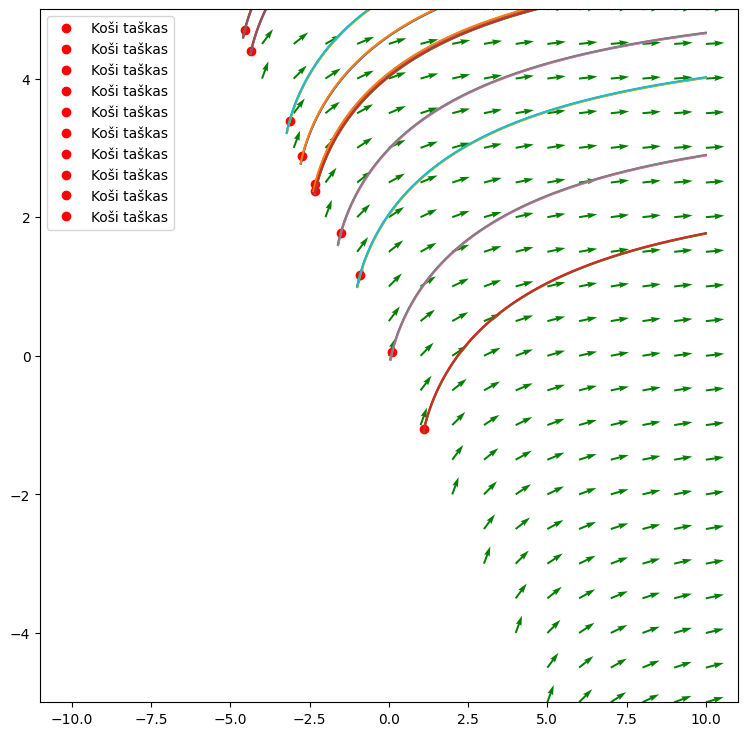

In [336]:
f = lambda x,y: np.exp(1-np.sqrt(x+y))
g = Graph(f, (1,1), [(-10,10), (-5,5)])
points = g.find_interesting_points(sample_size=100, epsilon=0.8, limit_points=10)
g.koshi_cutoff_k = 100
# print(points)
# g.perturbe = False
g.plot(points)